# Testing marginal distributions of the bivariate $t$ distribution

This notebook tests Frederi's derivation of the marginal distributions of the bivariate $t$ distribution, which is a univariate Student-$t$ distribution.

In [1]:
import numpy as np
from scipy.stats import multivariate_t

In [2]:
df=5
sig1 = 2
sig2 = 3
offdiag = sig1*sig2*0.9
scale=np.array([[sig1**2,offdiag],[offdiag,sig2**2]])
loc=np.array([3,4])
data = multivariate_t.rvs(df=df, shape=scale, loc=loc, size=100000000)

In [9]:
ind = 0
data_mar = data[:, ind]
print("mu", data_mar.mean())
print("var", np.var(data_mar))

mu 3.0001746742792625
var 6.668863582163601


In [14]:
sigma_i2 = scale[ind, ind]

In [15]:
var = df/(df-2) * sigma_i2
var

6.666666666666667

-6.440544787544638e-08

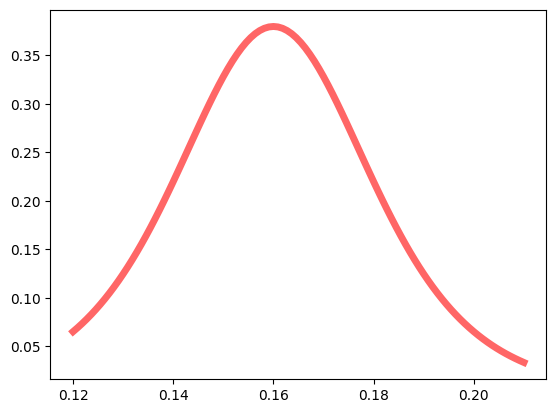

In [6]:
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
grid = np.linspace(0.12, 0.21, 100)
fig, ax = plt.subplots(1,1)

sigma = 0.02
df=5
loc=0.16
y = t.pdf(grid, df=df, loc=loc, scale=sigma)
ax.plot(grid, y*sigma, 'r-', lw=5, alpha=0.6, label='t pdf')
samples = t.rvs(size=100000000, df=df, loc=loc, scale=sigma)
np.var(samples) * (df-2)/df - sigma**2